In [1]:
import subprocess
from pybars import Compiler
import arguebuf as ab
compiler = Compiler()

def _list(this, options, items):
    result = []
    for item in items:
        result.append(options['fn'](item))
        result.append('\n')
    return result

def get_color(node_label):
    if node_label == "Support":
        return "green"
    elif node_label == "Attack":
        return "red"
    return "blue"

def get_shape(node_label):
    if node_label == "Support":
        return "box"
    elif node_label == "Attack":
        return "diamond"
    return "ellipse"


def export_graph(inp: ab.Graph, file: str, layout_engine="dot", return_str = False):
    source = """
        digraph "" {
        #nodesep=0.02
        #layersep=0.02
        #ranksep=0.02
        node [height=1.2,
            label="",
            style=filled,
            width=1.2,
            shape=ellipse,
            penwidth=0,
            color=blue
        ];
        sep=-10
        edge [arrowhead=none,
            style=tapered
        ];
        {{#list nodes}}"{{id}}" [color="{{color}}" shape="{{shape}}"] {{/list}}
        {{#list edges}}"{{source}}" -> "{{target}}" {{/list}}
    }
    """
    template = compiler.compile(source)
    helpers = {
        'list': _list,
    }
    output = template({'nodes': [{"id": node.id, "color": get_color(node.label), "shape": get_shape(node.label)} for node in inp.nodes.values()], 'edges': [{"source": edge.source.id, "target": edge.target.id} for edge in inp.edges.values()]}, helpers=helpers)
    if return_str:
        return output
    subprocess.run([layout_engine, "-Tpng", "-o", file], input=output.encode())

In [14]:
example_small = ab.load.file("persuasive-essays/essay001.ann")
export_graph(example_small, "test/example_small_twopi.png", layout_engine="twopi")
export_graph(example_small, "test/example_small_neato.png", layout_engine="neato")
export_graph(example_small, "test/example_small_sftp.png", layout_engine="sfdp")
example_large = ab.load.file("kialo-graphnli/10035.json")
export_graph(example_large, "test/example_large_twopi.png", layout_engine="twopi")
export_graph(example_large, "test/example_large_neato.png", layout_engine="neato")
export_graph(example_large, "test/example_large_sftp.png", layout_engine="sfdp")

In [15]:
from PIL import Image
i1 = Image.open("test/example_small_twopi.png")
i2 = Image.open("test/example_large_twopi.png")

i1.height, i1.width, i2.height, i2.width

(875, 772, 3134, 2537)

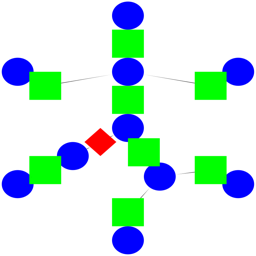

In [16]:
i1.resize((256,256))

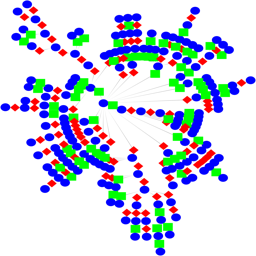

In [17]:
i2.resize((256,256))

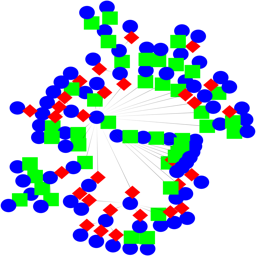

In [33]:
example_large2 = ab.load.file("kialo-graphnli/11186.json")
export_graph(example_large2, "test/example_large2_twopi.png", layout_engine="twopi")
i3 = Image.open("test/example_large2_twopi.png")
i3.resize((256,256))

<Axes: >

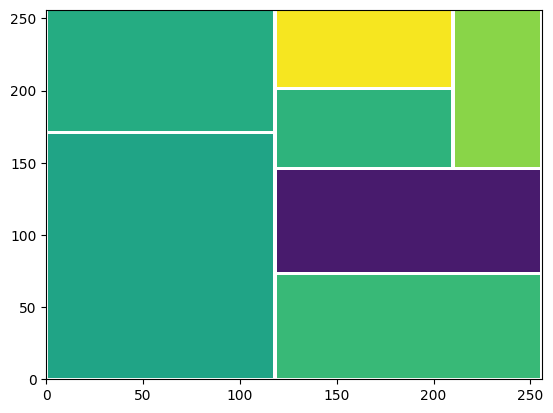

In [37]:
import squarify

# these values define the coordinate system for the returned rectangles
# the values will range from x to x + width and y to y + height
x = 0.
y = 0.
width = 256.
height = 256.

values = [4,2,2,2,1,1,1]
squarify.plot(values, 256, 256, pad=1)

In [2]:
files = {"araucaria": "json", "iac": "json", "kialo-graphnli": "json", "kialo": "txt", "microtexts": "json", "persuasive-essays": "ann", "qt30": "json"}

In [8]:
from glob import glob
from tqdm import tqdm
import os

for folder, ext in files.items():
    for file in tqdm(glob(f"{folder}/*.{ext}")):
        name = file.split('/')[-1]
        path = f"twopi/{folder}-{name}.png"
        # print(file)
        try:
            graph = ab.load.file(file)
            export_graph(graph, path, layout_engine="twopi")
            i = Image.open(path)
            i = i.resize((256,256))
            i.save(path)
        except Exception as e:
            print(e)
            os.remove(path)
            pass

  7%|▋         | 113/1560 [01:06<1:07:43,  2.81s/it]

Image size (218484695 pixels) exceeds limit of 178956970 pixels, could be decompression bomb DOS attack.


 27%|██▋       | 421/1560 [03:31<17:29,  1.08it/s]  /home/kilian/.cache/pypoetry/virtualenvs/evaluate-cbr-JaLQthFl-py3.10/lib/python3.10/site-packages/PIL/Image.py:3182: DecompressionBombWarning: Image size (154026735 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
 35%|███▌      | 551/1560 [05:03<1:10:51,  4.21s/it]

Image size (189423376 pixels) exceeds limit of 178956970 pixels, could be decompression bomb DOS attack.


 47%|████▋     | 734/1560 [06:32<08:48,  1.56it/s]  /home/kilian/.cache/pypoetry/virtualenvs/evaluate-cbr-JaLQthFl-py3.10/lib/python3.10/site-packages/PIL/Image.py:3182: DecompressionBombWarning: Image size (156083536 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
 52%|█████▏    | 811/1560 [07:44<1:32:20,  7.40s/it]

Image size (476951433 pixels) exceeds limit of 178956970 pixels, could be decompression bomb DOS attack.


 67%|██████▋   | 1052/1560 [09:26<02:42,  3.13it/s] /home/kilian/.cache/pypoetry/virtualenvs/evaluate-cbr-JaLQthFl-py3.10/lib/python3.10/site-packages/PIL/Image.py:3182: DecompressionBombWarning: Image size (176755152 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
 77%|███████▋  | 1198/1560 [10:41<03:51,  1.56it/s]/home/kilian/.cache/pypoetry/virtualenvs/evaluate-cbr-JaLQthFl-py3.10/lib/python3.10/site-packages/PIL/Image.py:3182: DecompressionBombWarning: Image size (112034670 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
 96%|█████████▌| 1493/1560 [13:17<04:48,  4.30s/it]

Image size (323048760 pixels) exceeds limit of 178956970 pixels, could be decompression bomb DOS attack.


100%|██████████| 1484/1484 [01:50<00:00, 13.43it/s]


In [39]:
test = Image.open("twopi/486.json.png")
test.resize((256,256))
test.height, test.width
test.save("twopi/486.json.png")

In [16]:
from datasets import load_dataset

dataset = load_dataset("imagefolder", data_dir="twopi")
del dataset["test"]

Resolving data files:   0%|          | 0/6474 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/110 [00:00<?, ?it/s]

In [18]:
ds = dataset["train"].train_test_split(test_size=0.1, seed=42)

In [21]:
ds

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 5826
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 648
    })
    validation: Dataset({
        features: ['image', 'label'],
        num_rows: 110
    })
})

In [20]:
ds["validation"] = dataset["validation"]

In [23]:
ds.push_to_hub("kblw/graphimages_twopi")

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/5826 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/59 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/648 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/7 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/110 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/2 [00:00<?, ?ba/s]

README.md:   0%|          | 0.00/288 [00:00<?, ?B/s]

In [4]:
# retrieval queries
from glob import glob
from tqdm import tqdm
import os
from PIL import Image


for file in tqdm(glob("microtexts-retrieval-simple/*.json")):
    name = file.split('/')[-1]
    path = f"twopi/microtexts-retrieval-simple-images/{name}.png"
    os.makedirs(os.path.dirname(path), exist_ok=True)
    # print(file)
    try:
        graph = ab.load.file(file)
        export_graph(graph, path, layout_engine="twopi")
        i = Image.open(path)
        i = i.resize((256,256))
        i.save(path)
    except Exception as e:
        print(e)
        os.remove(path)
        pass

  0%|          | 0/24 [00:00<?, ?it/s]

100%|██████████| 24/24 [00:00<00:00, 41.23it/s]


In [4]:
def build_tree(graph: ab.Graph, root: ab.AtomNode):
    if len(graph.incoming_atom_nodes(root)) == 0:
        return {"id": root.id, "label": root.label, "children": []}
    return {"id": root.id, "label": root.label, "children": [build_tree(graph, child) for child in graph.incoming_atom_nodes(root)]}

In [38]:
import arguebuf as ab

graph = ab.load.file("./kialo-graphnli/10035.json")

# find source nodes (i.e. nodes without incoming edges)
source_nodes = [node for node in graph.nodes.values() if len(graph.outgoing_edges(node)) == 0]
source_nodes

[AtomNode(10035.1, All couples should sign a prenuptial agreement before marriage.)]

In [39]:
graph.incoming_atom_nodes(source_nodes[0])

{AtomNode(10035.102, In addition to helping with planning in the case of a divorce, a prenup can help couples plan in the case of a spouse's death.),
 AtomNode(10035.107, As marriage loses ground in the modern world, with on-demand divorce, prenuptial agreements restore the ideals of real sacrifice, consequence, and promise.),
 AtomNode(10035.12, A person who contributes to the continuing success and growth of their spouse's business or professional practice may not be entitled to claim a share of the increase in value if they're pushed to agree otherwise in a premarital agreement.),
 AtomNode(10035.13, It can be difficult to project into the future about how potential issues should be handled, and what may seem like an inconsequential compromise in the romantic premarital period may seem more monumental and burdensome later on.),
 AtomNode(10035.2, Prenuptial agreement is the fairest way of dividing property in cases of divorce.),
 AtomNode(10035.3, If all couples signed prenups the c

In [47]:
graph.major_claim

AtomNode(10035.1, All couples should sign a prenuptial agreement before marriage.)

In [40]:
build_tree(graph, source_nodes[0])

{'id': '10035.1',
 'label': 'All couples should sign a prenuptial agreement before marriage.',
 'children': [{'id': '10035.3',
   'label': 'If all couples signed prenups the civil law system would become more efficient.',
   'children': [{'id': '10035.124',
     'label': 'The welfare of each individual who enters into a marriage contract is a more important consideration than the efficiency of the civil law system.',
     'children': [{'id': '10035.127',
       'label': 'The welfare of the individuals is better facilitated when they no longer need to wait for months for their case to be heard in the civil court system.',
       'children': []}]},
    {'id': '10035.219',
     'label': 'Congestion in family law courts can be combated through other reforms. For instance, reforms as simple as providing parties with better information at an earlier [stage](http://www.lawtimesnews.com/author/na/family-law-reforms-aim-to-cut-down-on-court-congestion-8057/) can reduce congestion by making part

In [41]:
def get_treemap_rects(tree, x, y, width, height, horizontal, depth=0) -> list:
    parts = len(tree["children"])
    if parts == 0:
        return []
    children_width = width // parts if horizontal else width
    children_height = height // parts if not horizontal else height
    res = []
    for i, child in enumerate(tree["children"]):
        if horizontal:
            child_x = x + i * children_width
            child_y = y
        else:
            child_x = x
            child_y = y + i * children_height
        res.append({"x": child_x, "y": child_y, "width": children_width, "height": children_height, "depth": depth})
        res += get_treemap_rects(child, child_x, child_y, children_width, children_height, not horizontal, depth+1)
    return res
        

In [42]:
width = 256
height = 256
get_treemap_rects(build_tree(graph, source_nodes[0]), 0, 0, width, height, True)

[{'x': 0, 'y': 0, 'width': 17, 'height': 256, 'depth': 0},
 {'x': 0, 'y': 0, 'width': 17, 'height': 64, 'depth': 1},
 {'x': 0, 'y': 0, 'width': 17, 'height': 64, 'depth': 2},
 {'x': 0, 'y': 64, 'width': 17, 'height': 64, 'depth': 1},
 {'x': 0, 'y': 128, 'width': 17, 'height': 64, 'depth': 1},
 {'x': 0, 'y': 128, 'width': 17, 'height': 64, 'depth': 2},
 {'x': 0, 'y': 128, 'width': 17, 'height': 64, 'depth': 3},
 {'x': 0, 'y': 192, 'width': 17, 'height': 64, 'depth': 1},
 {'x': 17, 'y': 0, 'width': 17, 'height': 256, 'depth': 0},
 {'x': 17, 'y': 0, 'width': 17, 'height': 85, 'depth': 1},
 {'x': 17, 'y': 0, 'width': 8, 'height': 85, 'depth': 2},
 {'x': 17, 'y': 0, 'width': 8, 'height': 85, 'depth': 3},
 {'x': 25, 'y': 0, 'width': 8, 'height': 85, 'depth': 2},
 {'x': 17, 'y': 85, 'width': 17, 'height': 85, 'depth': 1},
 {'x': 17, 'y': 85, 'width': 8, 'height': 85, 'depth': 2},
 {'x': 25, 'y': 85, 'width': 8, 'height': 85, 'depth': 2},
 {'x': 17, 'y': 170, 'width': 17, 'height': 85, 'depth'

In [43]:
# colors to use for different depth levels, should be various blue shades
colors = ["#e6f2ff", "#cce6ff", "#b3d9ff", "#99ccff", "#80bfff", "#66b3ff", "#4da6ff", "#3399ff", "#1a8cff", "#0080ff", "#0073e6", "#0066cc", "#0059b3", "#004d99", "#004080", "#003366", "#00264d", "#001a33", "#000d1a", "#000000"]
def get_depth_color(depth: int) -> str:
    return colors[depth % len(colors)]

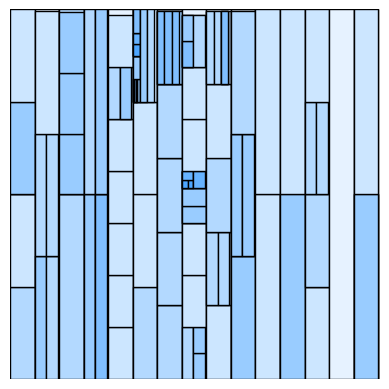

In [44]:
fig, ax = plt.subplots(1)
ax.set_xlim(0, width)
ax.set_ylim(0, height)
ax.set_aspect('equal', adjustable='box')
ax.axis('off')  # Remove axis labeling
ax.margins(0)  # Remove padding
for rect in get_treemap_rects(build_tree(graph, source_nodes[0]), 0, 0, width, height, True):
    ax.add_patch(patches.Rectangle((rect["x"], rect["y"]), rect["width"], rect["height"], fill=True, facecolor=get_depth_color(rect["depth"]), linewidth=1, edgecolor="black"))

plt.show()

In [45]:
ab.render.graphviz(ab.dump.graphviz(graph), "test.png")

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.683828 to fit


In [46]:
from PIL import Image
Image.open("test.png")

/home/kilian/.cache/pypoetry/virtualenvs/evaluate-cbr-Epwt-pU6-py3.10/lib/python3.10/site-packages/PIL/Image.py:3182: DecompressionBombWarning: Image size (165964855 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
